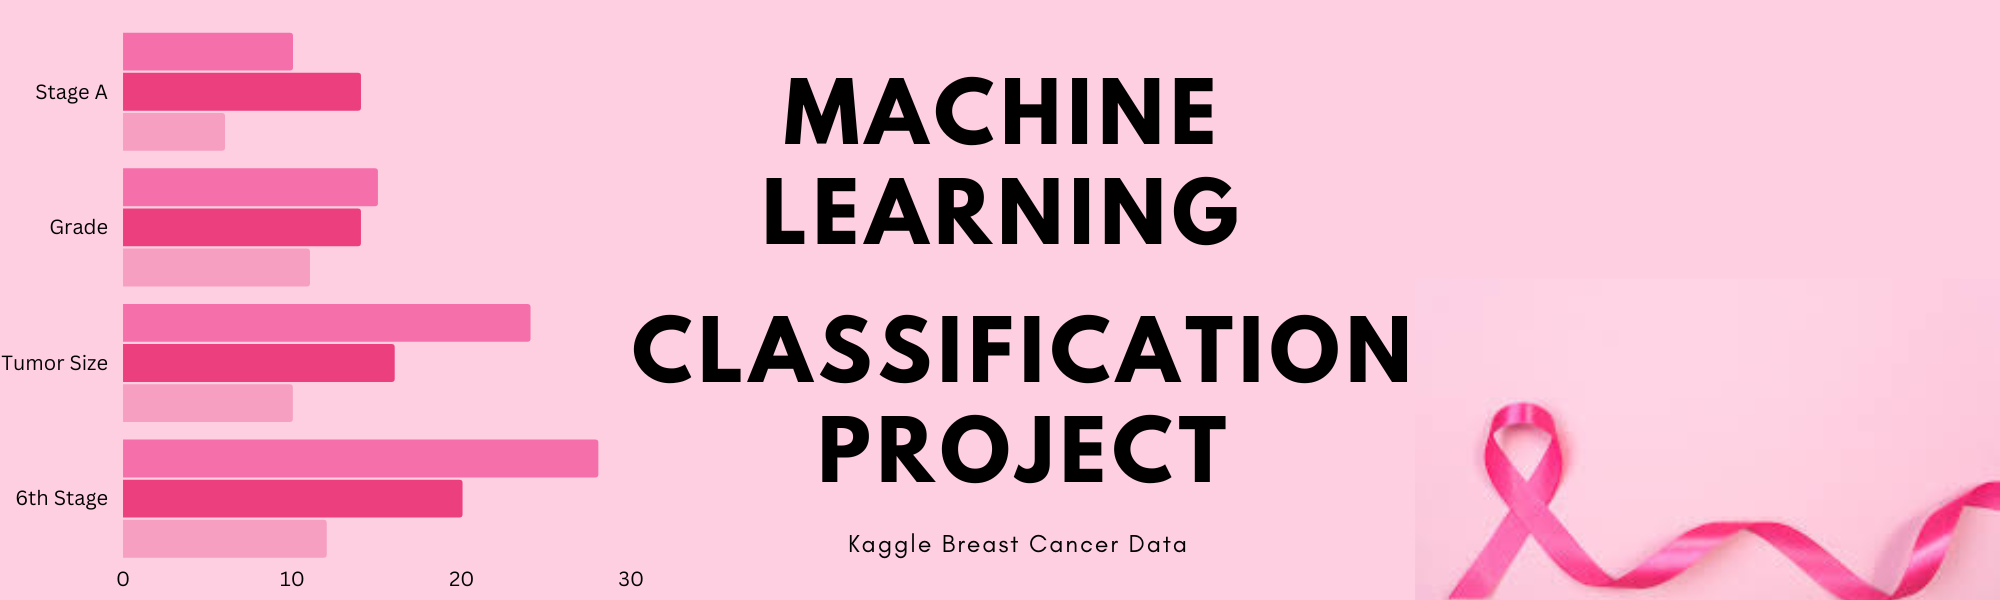

# <center><b>Predicitng the Grade</b></center>


<span style="color:pink">In this Notebook I will use a variety of models to predcit the grade of the patient. <br>
* In the original data the grade column is ordinal from 1 to 4.<br>
* the eda shows that imblanced, high volume of grade number 2 with less 1 and 3. also, a very mninmal amount of 4's.
* I will use be using a data auggmentation method called: SMOTE to syntheticly oversampled classes 1 & 3
* after consideration and to avoid overfitting, we will not try to predict grade 4 and will delete the patients with this grade from our data.
 </br></span>

# Import Libaries

In [1]:
## install libraries
# %pip install imbalanced-learn
# %pip install xgboost

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from cancer_func import cancer_encode
from cancer_func import cancer_features_select

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from sklearn.utils import class_weight
from cancer_func import cancer_encode
from cancer_func import cancer_features_select
from cancer_func import cancer_encoder
from cancer_func import cancer_features_selector
from cancer_func import report, cross_validation_report
from cancer_func import cancer_encode_without_ms

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Observation

In [3]:
df = pd.read_csv('Breast_Cancer.csv')
df_copy = df.copy()
cancer_encoder = FunctionTransformer(cancer_encode, validate=False)
cancer_features_selector = FunctionTransformer(cancer_features_select, validate=False)
df = cancer_encode(df)
df = cancer_features_select(df)
df.head()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,...,Marital Status_Single,Marital Status_Widowed,6th Stage_IIA,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Regional_Node_pos_%,Estrogen&Progesterone positive,Estrogen&Progesterone Negative
0,68,0.0,0.0,0.0,3.0,0.0,4,1.0,1.0,24,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.166667,1.0,0.0
1,50,1.0,1.0,2.0,2.0,0.0,35,1.0,1.0,14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.714286,1.0,0.0
2,58,2.0,2.0,4.0,2.0,0.0,63,1.0,1.0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1.0,0.0
3,58,0.0,0.0,0.0,3.0,0.0,18,1.0,1.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.000000,1.0,0.0
4,47,1.0,0.0,1.0,3.0,0.0,41,1.0,1.0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,33.333333,1.0,0.0


Class=3.0, Count=1111, Percentage=27.609%
Class=2.0, Count=2351, Percentage=58.424%
Class=1.0, Count=543, Percentage=13.494%
Class=4.0, Count=19, Percentage=0.472%


<BarContainer object of 4 artists>

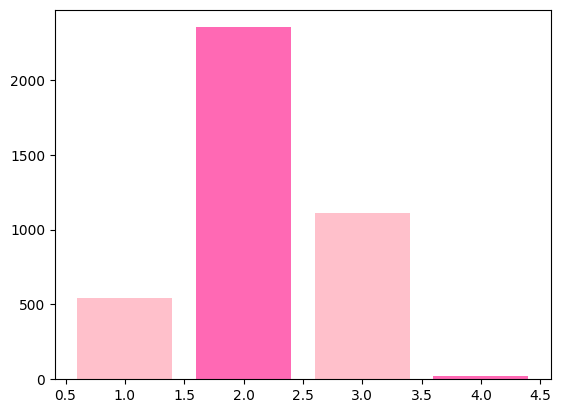

In [4]:
#plot the distribution before smote 
counter = Counter(df.Grade)
colors = ['#FFC0CB', '#FF69B4']  # Pinkish colors
for k,v in counter.items():
    per = v / len(df.Grade) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per)) 
plt.bar(counter.keys(), counter.values(), color=colors)

# Simple Models Pipeline

## Data Prepocessing

In [5]:
#delete class 4
# df = df.drop(df[df['Grade'] == 4.0].index)
#split to train and test
#split to x and y
X = df.drop('Grade', axis=1)
y= df['Grade']

#split to train and test 
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#drop grade 4 from y_train
X_train =X_train[y_train!=4]
y_train = y_train[y_train!=4]

# Encode the target variable
# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_test_encoded = le.transform(y_test)

Class=3.0, Count=1111, Percentage=27.609%
Class=2.0, Count=2351, Percentage=58.424%
Class=1.0, Count=543, Percentage=13.494%
Class=4.0, Count=19, Percentage=0.472%


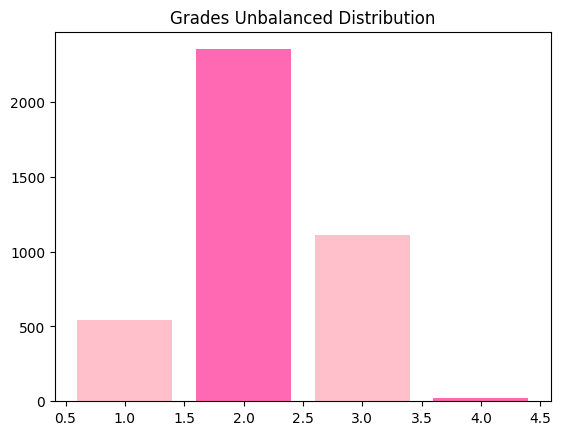

In [6]:
# Grades Unbalanced Distribution
plt.title("Grades Unbalanced Distribution")

# plot the distribution before smote
counter = Counter(df.Grade)
colors = ['#FFC0CB', '#FF69B4']  # Pinkish colors
for k, v in counter.items():
    per = v / len(df.Grade) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per)) 
plt.bar(counter.keys(), counter.values(), color=colors)

plt.show()

# Simple Models

In [7]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),

}

## define a ascorer which prioritize 

# Calculate class weights
# Define the class weights
class_weights1 = {
    3.0: 2.0,
    2.0: 1.5,
    1.0: 1.0
}

# Build pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipeline = Pipeline([
        ('smote', SMOTE()),
        ('scaler', StandardScaler(with_mean=False, with_std=True)),
        ('model', model.set_params(class_weight=class_weights1))
    ])
    pipelines[model_name] = pipeline

# Define the parameter grids
param_grids = {
    'Logistic Regression': {'model__C': [0.1, 1, 10],'smote__sampling_strategy': [{1:1000,3:1000},{1:2000,3:2000},{1:2000,3:1000},{1:1000,3:2000}],"smote__k_neighbors": [5,6,7,8]},"model__class_weight": [{1:1,3:2},{1:1,3:1.5},{1:1,3:1.0}],
    'Decision Tree': {'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],'smote__sampling_strategy': [{1:1000,3:1000},{1:2000,3:2000},{1:2000,3:1000},{1:1000,3:2000}],"smote__k_neighbors": [5,6,7,8]},"model__class_weight": [{1:1,3:2},{1:1,3:1.5},{1:1,3:1.0}]}


# Perform grid search and cross-validation for each model
for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the model using cross-validation
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1_macro')

    # Generate classification report
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)

    # Print the results
    print(f"Model: {model_name}")
    print(f"Best parameters: {best_params}")
    print(f"Cross-validation scores: {scores}")
    print(f"Classification report:\n{report}")
    print("-----------------------------\n")

Model: Logistic Regression
Best parameters: {'model__C': 1, 'smote__k_neighbors': 6, 'smote__sampling_strategy': {1: 1000, 3: 1000}}
Cross-validation scores: [0.36836717 0.38849946 0.36315191 0.40008201 0.39605221]
Classification report:
              precision    recall  f1-score   support

         1.0       0.10      0.01      0.01       163
         2.0       0.62      0.79      0.69       706
         3.0       0.45      0.39      0.42       333
         4.0       0.00      0.00      0.00         6

    accuracy                           0.57      1208
   macro avg       0.29      0.30      0.28      1208
weighted avg       0.50      0.57      0.52      1208

-----------------------------

Model: Decision Tree
Best parameters: {'model__max_depth': 6, 'smote__k_neighbors': 8, 'smote__sampling_strategy': {1: 2000, 3: 1000}}
Cross-validation scores: [0.39060013 0.37948785 0.36047803 0.36133168 0.43772261]
Classification report:
              precision    recall  f1-score   support

 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from yellowbrick.classifier import ClassificationReport

def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=[1.0, 2.0, 3.0, 4.0],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

for model in models:
    visualize_model(X, y, model)


YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

# Ensmble Methods Training

In [ ]:
df= df_copy 
cancer_encoder = FunctionTransformer(cancer_encode, validate=False)
cancer_features_selector = FunctionTransformer(cancer_features_select, validate=False)
df = cancer_encode(df)
df = cancer_features_select(df)
df.head()

In [ ]:
#delete class 4
# df = df.drop(df[df['Grade'] == 4.0].index)
#split to train and test
#split to x and y
X = df.drop('Grade', axis=1)
y= df['Grade']
#split to train and test 
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
#plot the distribution before smote 
counter = Counter(df.Grade)
colors = ['#FFC0CB', '#FF69B4']  # Pinkish colors

for k, v in counter.items():
    per = v / len(df.Grade) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

plt.bar(counter.keys(), counter.values(), color=colors)
plt.show()

* add max depth and mean sample leaf to the rf


In [ ]:
# Define the models
models = {
    'Random Forest': RandomForestClassifier(),
}


# Build pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipeline = Pipeline([
        ('smote', SMOTE()),
        ('scaler', StandardScaler(with_mean=False, with_std=True)),
        ('model', model)
    ])
    pipelines[model_name] = pipeline

# Define the parameter grids for each model
param_grids = {
    'Random Forest': {'model__n_estimators': [100, 200, 300], 'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],'model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
}

# Perform grid search and cross-validation for each model
for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the model using cross-validation
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1_macro')

    # Generate classification report
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, sample_weight=None)

    # Print the results
    print(f"Model: {model_name}")
    print(f"Best parameters: {best_params}")
    print(f"Cross-validation scores: {scores}")
    print(f"Classification report:\n{report}")
    print("-----------------------------\n")

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='PiYG')
plt.xlabel("Predicted Grade")
plt.ylabel("True Grade")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
df.groupby('Grade').count()

In [ ]:
# import pandas as pd
# import warnings
# from sklearn.model_selection import GridSearchCV
# from imblearn.pipeline import Pipeline
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from xgboost import XGBClassifier

# warnings.filterwarnings("ignore", category=UserWarning, message="After over-sampling, the number of samples .*")

# df = pd.read_csv('Breast_Cancer.csv')
# df = cancer_encode_without_ms(df)
# #df = cancer_encode(df)
# df = cancer_features_select(df)
# X = df.drop(['Grade'], axis=1, inplace=False) # should be without
# y = df['Grade']
# y = y.astype(int)
# y = y - 1

# XGB = XGBClassifier(n_estimators=450)
# over = SMOTE(sampling_strategy={0: 1000, 2: 1000}, k_neighbors=15)
# scaler = StandardScaler()
# XGB_steps = [("scaler", scaler), ("over", over), ("XGB", XGB)]
# pipe_XGB = Pipeline(steps=XGB_steps)

# param_grid_XGB = {
#     "XGB__max_depth": [3, 4],
#     "XGB__gamma": [2, 3],
#     "XGB__learning_rate": [0.05, 0.01],
# }

# XGB_search = GridSearchCV(pipe_XGB, param_grid_XGB, n_jobs=4, scoring='f1_macro')
# XGB_search.fit(X, y)
# XGB_estimator = XGB_search.best_estimator_

# print("Best parameter (CV score=%0.3f):" % XGB_search.best_score_)
# print(XGB_search.best_params_)

# # Generate classification report
# y_pred = XGB_search.predict(X)
# report = classification_report(y, y_pred, sample_weight=None)

# # Print the results
# print("Model: XGBoost")
# print(f"Best parameters: {XGB_search.best_params_}")
# print(f"Classification report:\n{report}")
# print("-----------------------------\n")


In [ ]:
df.head()

In [ ]:
df = pd.read_csv('Breast_Cancer.csv')
df = cancer_encode_without_ms(df)
#df = cancer_encode(df)
df = cancer_features_select(df)
X = df.drop(['Grade'], axis=1, inplace=False) #sould be without  
y = df['Grade']
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to the 'color' column
X = encoder.fit_transform(X[['color']])
y =y.astype(int)
y = y -1
XGB = XGBClassifier(n_estimators=450)
over = SMOTE()
scaler = StandardScaler()  
XGB_steps = [("scaler", scaler), ("over", over), ("XGB", XGB)]
pipe_XGB= Pipeline(steps=XGB_steps)
# Calculate the number of samples in the majority class
majority_class_samples = max(df['Grade'].value_counts())

param_grid_XGB = {
    'over__sampling_strategy': [{0: majority_class_samples, 1: majority_class_samples, 2: majority_class_samples, 3: majority_class_samples}],
    "over__k_neighbors": [15,9],
    "XGB__max_depth": [3,4],
    #"XGB__scale_pos_weight": [10,50],
    #'XGB__subsample': [1.0],
    #"XGB__colsample_bytree": [1.0],
    "XGB__gamma":[2,3],
    "XGB__learning_rate":[0.05,0.01],
}
XGB_search = GridSearchCV(pipe_XGB, param_grid_XGB, n_jobs=4,scoring='f1_macro')
XGB_search.fit(X, y)
XGB_estimator =XGB_search.best_estimator_

print("Best parameter (CV score=%0.3f):" % XGB_search.best_score_)
print(XGB_search.best_params_)

In [13]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Read the dataset
df = pd.read_csv('Breast_Cancer.csv')

# Perform data preprocessing steps
df = cancer_encode_without_ms(df)
df = cancer_features_select(df)
X = df.drop(['Grade'], axis=1, inplace=False)
y = df['Grade']
y = y.astype(int)
y = y - 1

# Calculate the number of samples in the majority class
majority_class_samples = max(df['Grade'].value_counts())

# Create the XGBClassifier and SMOTE objects
XGB = XGBClassifier(n_estimators=450)
scaler = StandardScaler()

# Define the steps of the pipeline
XGB_steps = [("scaler", scaler),  ("XGB", XGB)]
pipe_XGB = Pipeline(steps=XGB_steps)

# Define the parameter grid for GridSearchCV
param_grid_XGB = {
    "over__k_neighbors": [15, 9],
    "XGB__max_depth": [3, 4],
    "XGB__gamma": [2, 3],
    "XGB__learning_rate": [0.05, 0.01],
}

# Perform grid search with cross-validation
XGB_search = GridSearchCV(pipe_XGB, param_grid_XGB, n_jobs=4, scoring='f1_macro')
XGB_search.fit(X, y)
XGB_estimator = XGB_search.best_estimator_

# Print the best parameters and CV score
print("Best parameter (CV score=%0.3f):" % XGB_search.best_score_)
print(XGB_search.best_params_)


ValueError: Invalid parameter 'over' for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=450,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='PiYG')
plt.xlabel("Predicted Grade")
plt.ylabel("True Grade")
plt.title("Xgboost Confusion Matrix")
plt.show()

In [ ]:
# Extract feature importances from the best estimator
importances = XGB_estimator.named_steps['XGB'].feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Xgboost Feature Importances")
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, make_scorer, recall_score
from sklearn.preprocessing import OneHotEncoder


# Read the dataset
df = pd.read_csv('Breast_Cancer.csv')

# Define the features and target variables
X = df.drop('Grade', axis=1)
y = df['Grade']

# Split the data into train and test sets

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to the 'color' column
X = encoder.fit_transform(X[['color']])

# Create the XGBClassifier object
xgb = XGBClassifier(n_estimators=450)

# Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy={0: 1880, 1: 1880, 2: 1880, 3: 1880}, k_neighbors=15)),
    ('xgb', xgb)
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the parameter grid for GridSearchCV
param_grid = {
    'xgb__max_depth': [3, 4],
    'xgb__gamma': [2, 3],
    'xgb__learning_rate': [0.05, 0.01]
}

# Define the scoring metric and make it prioritize recall for Grade 3
scoring = {
    'f1_macro': 'f1_macro',
    'recall_grade_3': make_scorer(recall_score, average=None, labels=[3], greater_is_better=True)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, refit='recall_grade_3', cv=5)
grid_search.fit(X, y)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(X)

# Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred))

# Print the best parameters and CV scores
print("Best parameters:")
print(grid_search.best_params_)
print("Best CV scores:")
print("F1 macro:", grid_search.best_score_)
print("Recall for Grade 3:", recall_score(y, y_pred, average=None, labels=[3]))


KeyError: "None of [Index(['color'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

# Load the data
data = pd.read_csv('Breast_Cancer.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Grade', axis=1)
y = data['Grade']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to the 'color' column
X_train = encoder.fit_transform(X_train[['color']])

# Preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale numerical features
    ('encoder', OneHotEncoder(sparse=False)),  # One-hot encode categorical features
])

# Fit and transform the training data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Define the classifier
classifier = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
}

# Create the pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', classifier),
])

# Define the scoring metric
scoring = {
    'recall_grade_3': 'recall_macro',
    'accuracy': 'accuracy',
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, refit='recall_grade_3', cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Evaluate the model on the test set
X_test_processed = preprocessing_pipeline.transform(X_test)
y_pred = best_estimator.predict(X_test_processed)
print(classification_report(y_test, y_pred))


In [ ]:
df.columns